### Programming for Data Analysis Project

Author: Agnieszka Waszczuk

*** 
This repository is used for the project given by the lecture on Programming for <em><strong> Data Analysis module on Higher Diploma in Science in Computing in Data Analytics at ATU.</strong></em>
 

***

## Introduction 

In this analysis, we aim to explore and visualize the CO2, temperature anomalies over the years, considering the unique reference periods for different regions. By leveraging this dataset, we seek to uncover patterns, trends, and potential correlations that contribute to a deeper understanding of climate dynamics.

In [206]:
# Important library 

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

### The EPICA deep Ice Cores 800KYr Deuterium Data and Temperature Estimates

This research article delves into the European Project for Ice Coring in Antarctica (EPICA), focusing on two pivotal deep ice cores drilled in Dome C and Dronning Maud Land (DML). With the primary goal of understanding climatic variations in the Southern Hemisphere, the Dome C core offers insights into global climate mechanisms over extensive cycles, while the DML core provides a detailed record for comparative analysis with Greenland records. Published in the Annals of Glaciology in 2004, this study contributes to the broader understanding of climate dynamics on the Antarctic continent[1].

Temperature was estimated after correction for sea-water isotopic composition (Bintanja et al, 2005) and for ice sheet elevation (Parrenin et al, 2007) on EDC3 age scale (Parrenin et al, 2007)[2].


[1]. https://www.cambridge.org/core/journals/annals-of-glaciology/article/epica-deep-ice-cores-first-results-and-perspectives/BFC6D11388E8723E5B6BE0978A39201B#

[2]. https://doi.pangaea.de/10.1594/PANGAEA.683655

In [207]:
# Read the text file into a DataFrame
df = pd.read_csv('data/EPICA Dome C Ice Core 800KYr 2007.txt', sep='\s+', skiprows=91).dropna()
df=df.drop(['Bag','ztop','Deuterium'],axis=1)
df = pd.read_csv('data/EPICA Dome C Ice Core 800KYr 2007.txt', sep='\s+', skiprows=91).dropna()
df=df.drop(['Bag','ztop','Deuterium'],axis=1)
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5785 entries, 12 to 5799
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          5785 non-null   float64
 1   Temperature  5785 non-null   float64
dtypes: float64(2)
memory usage: 135.6 KB


In [208]:
# Checking for null entries in each column
null_counts = df.isnull().sum()
# Display the count of null values in each column
print("Null counts in each column:")
print(null_counts)

Null counts in each column:
Age            0
Temperature    0
dtype: int64


In [209]:
df.head(10)

,Age,Temperature
12,38.37379,0.88
13,46.81203,1.84
14,55.05624,3.04
15,64.41511,0.35
16,73.15077,-0.42
17,81.93244,0.05
18,90.75925,0.05
19,99.97031,-0.52
20,109.88879,0.79
21,119.25888,-0.55


#### Histogram for Temperature and Age 



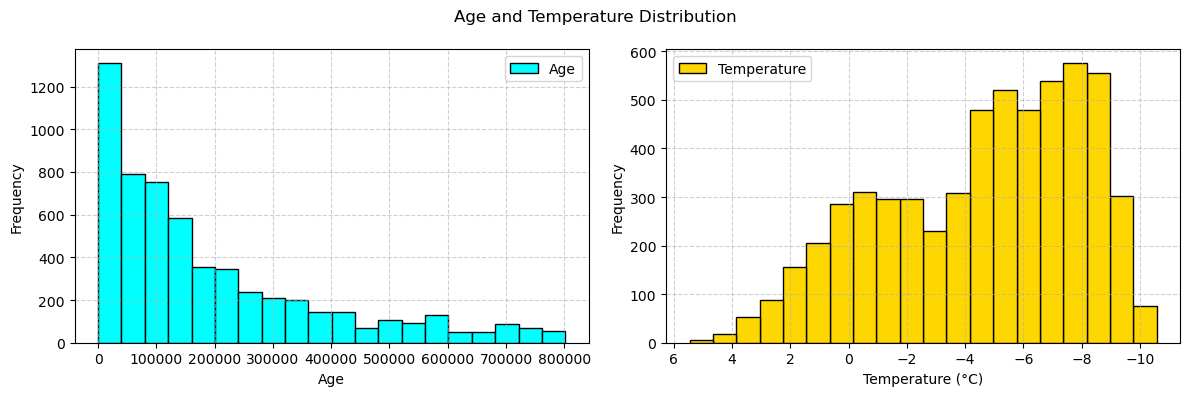

In [210]:
# Histogram for temperature data
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Age histogram
axs[0].hist(df['Age'], label="Age", bins=20, color='aqua', edgecolor='black')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')
# Add legend 
axs[0].legend()
# Add grid
axs[0].grid(True, linestyle='--', alpha=0.6)  # Add grid

# Temperature histogram
axs[1].hist(df['Temperature'], label="Temperature", bins=20, color= 'gold', edgecolor='black')
axs[1].set_xlabel('Temperature (°C)')
axs[1].set_ylabel('Frequency')
# Add legend 
axs[1].legend()
# Add grid
axs[1].grid(True, linestyle='--', alpha=0.6)  # Add grid

# Addig title
plt.suptitle("Age and Temperature Distribution")

# Adjust layout
plt.tight_layout()

#Inverts the x-axis, making the latest years appear on the right
plt.gca().invert_xaxis()

# Show the plot
plt.show()


In [211]:
#Summary statistics 
df.describe()


,Age,Temperature
count,5785.000000,5785.000000
mean,190506.560624,-4.580228
std,192554.547328,3.446971
min,38.373790,-10.580000
25%,46793.812500,-7.450000
50%,122110.190000,-5.200000
75%,273338.430000,-1.820000
max,801662.000000,5.460000


In [212]:
# Folder location
input_folder = r'C:\Users\PC\DA\PDA_Project_2\data'

# files names
filename01='41586_2008_BFnature06949_MOESM31_ESM.xls'
filename02='epicaDC.deuttemp.EDC3-AICC.xls'
filename03='grl52461-sup-0003-supplementary.xls'

In [213]:
# READ THE THE SHEETS FROM FILES

# 3 sheets from first file
co2_new = pd.read_excel(os.path.join(input_folder,filename01),sheet_name='1.  new CO2 data',skiprows=6)
vostok = pd.read_excel(os.path.join(input_folder,filename01),sheet_name='2.  Vostok-TD-Dome C',skiprows=6)
co2_composite = pd.read_excel(os.path.join(input_folder,filename01),sheet_name='3.  Composite CO2',skiprows=6)

In [214]:
#Information about the structure of dataset
co2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Depth (m)          247 non-null    float64
 1   EDC3_gas_a (yr)    247 non-null    int64  
 2   CO2 (ppmv)         247 non-null    float64
 3   sigma (ppmv)       247 non-null    float64
 4   Depth (m).1        47 non-null     float64
 5   EDC3_gas_a (yr).1  47 non-null     float64
 6   CO2 (ppmv).1       47 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 13.6 KB


In [119]:
# Checking first few rows
co2_new.head()

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
0,3026.58,611269,257.8,2.1,3061.71,667435.0,178.5
1,3030.97,616164,252.6,0.6,3063.98,670124.0,189.0
2,3036.44,623109,243.3,2.8,3085.78,688035.0,234.0
3,3040.87,630183,204.4,0.9,3086.88,688751.0,235.4
4,3043.07,635364,195.0,1.5,3087.98,689444.0,241.0


In [215]:
#Information about the structure of dataset
vostok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Depth (m)                                    183 non-null    float64
 1   EDC3_gas_a (yr)                              183 non-null    float64
 2   CO2 (ppmv)                                   183 non-null    float64
 3   sigma (ppmv)                                 183 non-null    float64
 4   Depth (m).1                                  372 non-null    float64
 5   EDC3_gas_a (yr).1                            372 non-null    int64  
 6   CO2 (ppmv).1                                 372 non-null    float64
 7   Depth (m).2                                  73 non-null     float64
 8   tentatively synchronized on EDC3_gas_a (yr)  73 non-null     float64
 9   CO2 (ppmv).2                                 73 non-null     float64
 10  si

In [216]:
# Checking first few rows
vostok.head()

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1,Depth (m).2,tentatively synchronized on EDC3_gas_a (yr),CO2 (ppmv).2,...,Depth (m).4,EDC3_gas_a (yr).3,CO2 (ppmv).4,Depth (m).5,EDC3_gas_a (yr).4,CO2 (ppmv).5,sigma (ppmv).3,Depth (m).6,EDC3_gas_a (yr).5,CO2 (ppmv).6
0,102.83,137.0,280.4,1.8,149.1,2690,284.7,380.82,18906.0,190.5,...,2700.77,392544.0,259.5,3026.58,611269.0,257.8,2.1,3061.71,667435.0,178.5
1,106.89,268.0,274.9,0.7,173.1,3897,272.7,382.42,23379.0,189.1,...,2702.97,393579.0,273.6,3030.97,616164.0,252.6,0.6,3063.98,670124.0,189.0
2,107.20,279.0,277.9,0.7,177.4,4124,268.1,382.76,24011.0,189.0,...,2705.17,394560.0,260.7,3036.44,623109.0,243.3,2.8,3085.78,688035.0,234.0
3,110.25,395.0,279.1,1.3,228.6,6735,262.2,383.54,25337.0,187.7,...,2713.97,398086.0,276.3,3040.87,630183.0,204.4,0.9,3086.88,688751.0,235.4
4,110.50,404.0,281.9,1.1,250.3,7873,254.5,385.33,27507.0,195.2,...,2718.37,399722.0,277.1,3043.07,635364.0,195.0,1.5,3087.98,689444.0,241.0


In [217]:
#Information about the structure of dataset
co2_composite.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDC3_gas_a (yr)  1096 non-null   int64  
 1   CO2 (ppmv)       1096 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


###  Composite CO2 Data 


    
    

In [218]:
# Checking first few rows
co2_composite.head()


,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


In [219]:
# Checking for null entries
print(co2_composite.isnull().sum())

EDC3_gas_a (yr)    0
CO2 (ppmv)         0
dtype: int64


The output indicates there are no null entries for "year" or "CO2 (ppmv)" columns.

In [220]:
#Summary statistics 
co2_composite.describe()


,EDC3_gas_a (yr),CO2 (ppmv)
count,1096.000000,1096.000000
mean,390905.979015,230.835675
std,262092.947239,27.573616
min,137.000000,171.600000
25%,137133.500000,207.500000
50%,423206.500000,231.450000
75%,627408.000000,251.525000
max,798512.000000,298.600000


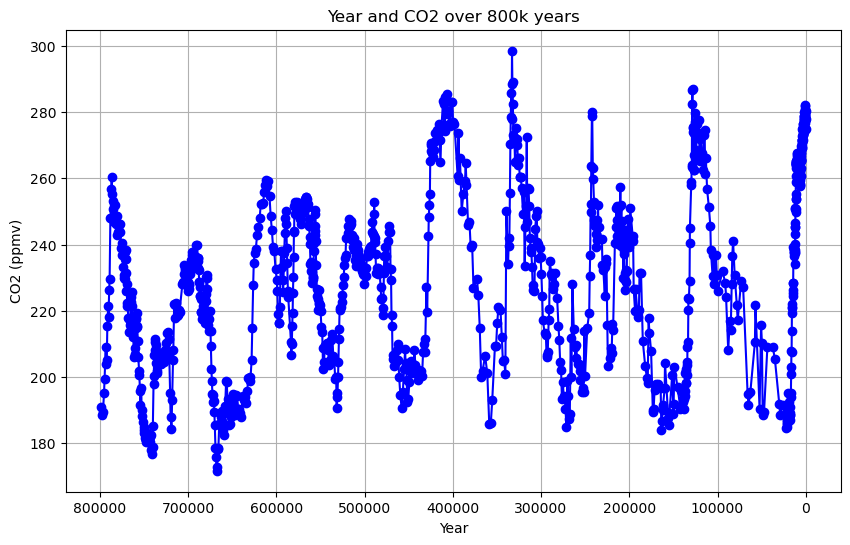

In [221]:
# Reanme column EDC3 as year
co2_composite.rename(columns={'EDC3_gas_a (yr)': 'year'}, inplace=True)

# Add plotting
plt.figure(figsize=(10, 6)) # set up size of the figure 
plt.plot(co2_composite['year'], co2_composite['CO2 (ppmv)'], marker='o', color='blue')
# Add label
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
# Add title
plt.title('Year and CO2 over 800k years')
#Inverts the x-axis, making the latest years appear on the right
plt.gca().invert_xaxis()
# Add grid 
plt.grid(True)
plt.show()



###  Epica 



In [222]:
# Second file
epica = pd.read_excel(os.path.join(input_folder,filename02))


In [223]:
epica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bag           5819 non-null   int64  
 1   ztop          5819 non-null   float64
 2   EDC3béta      5819 non-null   float64
 3   AICC2012      5819 non-null   float64
 4   deutfinal     5804 non-null   float64
 5   temp          5819 non-null   float64
 6   acc-EDC3beta  5819 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 318.4 KB


In [224]:
epica.head()


,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453


In [225]:
# Checking for null entries
print(epica.isnull().sum())

bag              0
ztop             0
EDC3béta         0
AICC2012         0
deutfinal       15
temp             0
acc-EDC3beta     0
dtype: int64


The column deutfinal has 15 null entries. 

In [226]:
#Droping the rows with null values
epica = epica.dropna(subset=['deutfinal'])


In [128]:
#Summary statistics 
epica.describe()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
count,5819.00000,5819.000000,5819.000000,5819.000000,5804.000000,5819.000000,5819.000000
mean,2910.00000,1599.950000,191800.948469,192715.210134,-417.742884,213.474721,2.044824
std,1679.94494,923.969717,193448.729761,195698.666350,17.949569,3.130075,0.678126
min,1.00000,0.000000,-50.000000,-55.000000,-450.100000,207.900000,1.096556
25%,1455.50000,799.975000,47540.535000,46505.000000,-432.300000,210.900000,1.508500
50%,2910.00000,1599.950000,123446.200000,121574.666700,-421.300000,212.900000,1.838000
75%,4364.50000,2399.925000,276835.550000,277050.500000,-403.200000,216.000000,2.514000
max,5819.00000,3199.900000,820093.900000,821838.000000,-361.200000,223.100000,4.641000


In [227]:

co02_composite02=pd.read_excel(os.path.join(input_folder,filename03),sheet_name='CO2 Composite',skiprows=14)

#### Co02 composit 

In [228]:
#Information about the structure of dataset
co02_composite02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gasage (yr BP)         1901 non-null   float64
 1   CO2 (ppmv)             1901 non-null   float64
 2   sigma mean CO2 (ppmv)  1901 non-null   float64
dtypes: float64(3)
memory usage: 44.7 KB


In [131]:
co02_composite02.head()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007


In [229]:
# Checking for null entries
print(co02_composite02.isnull().sum())

Gasage (yr BP)           0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64


Data does not have missing values in these particular columns.

In [230]:
# Checking column names
print(co02_composite02.columns)

# Display DataFrame information
co02_composite02.info()

# Print the first few rows
print(co02_composite02.head()) 
print(co02_composite02.columns)

# Display DataFrame information
co02_composite02.info()

# Print the first few rows
print(co02_composite02.head())

Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gasage (yr BP)         1901 non-null   float64
 1   CO2 (ppmv)             1901 non-null   float64
 2   sigma mean CO2 (ppmv)  1901 non-null   float64
dtypes: float64(3)
memory usage: 44.7 KB
   Gasage (yr BP)   CO2 (ppmv)  sigma mean CO2 (ppmv)
0       -51.030000  368.022488               0.060442
1       -48.000000  361.780737               0.370000
2       -46.279272  359.647793               0.098000
3       -44.405642  357.106740               0.159923
4       -43.080000  353.946685               0.043007
Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):

### Review data !! 

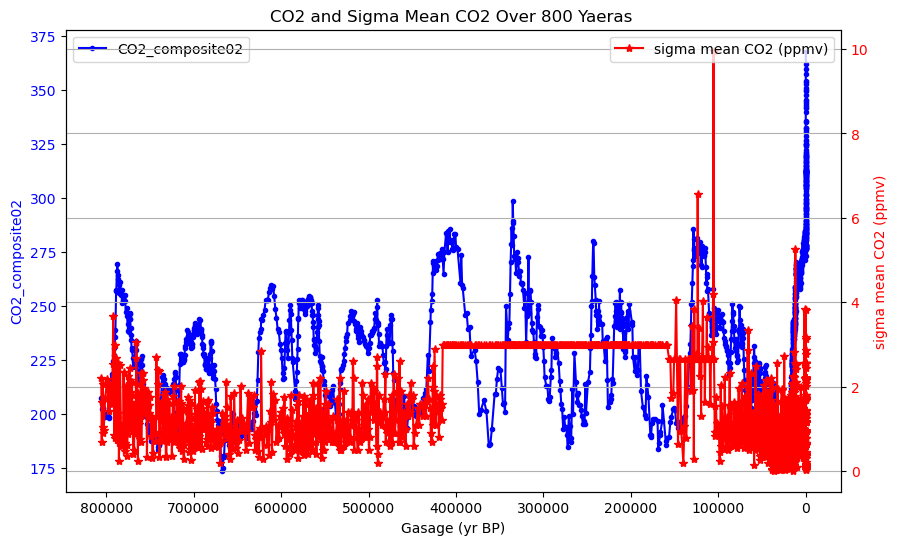

In [231]:
# Remove leading and trailing whitespaces from column names
co02_composite02.columns = co02_composite02.columns.str.strip()

# Creating plot 
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot on the first y-axis
ax1.plot(co02_composite02['Gasage (yr BP)'], co02_composite02['CO2 (ppmv)'], label='CO2_composite02', marker='.', color='blue')
ax1.set_xlabel('Gasage (yr BP)')
ax1.set_ylabel('CO2_composite02', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(co02_composite02['Gasage (yr BP)'], co02_composite02['sigma mean CO2 (ppmv)'], label='sigma mean CO2 (ppmv)', marker='*', color='red')
ax2.set_ylabel('sigma mean CO2 (ppmv)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

#Inverts the x-axis, making the latest years appear on the right
plt.gca().invert_xaxis()

# Adding title of plot
plt.title('CO2 and Sigma Mean CO2 Over 800 Yaeras ')
plt.grid(True)
plt.show()


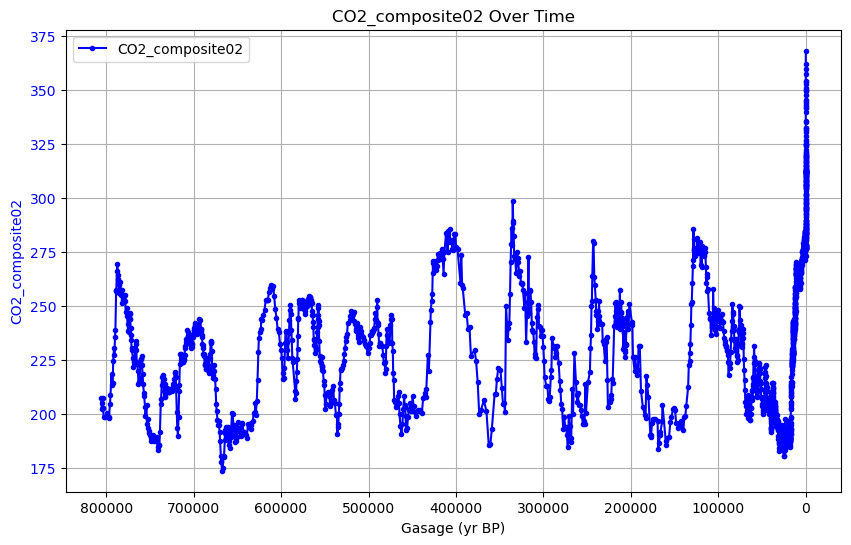

In [135]:
# Remove leading and trailing whitespaces from column names
co02_composite02.columns = co02_composite02.columns.str.strip()

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CO2 and Gasage on the same axes
ax.plot(co02_composite02['Gasage (yr BP)'], co02_composite02['CO2 (ppmv)'], label='CO2_composite02', marker='.', color='blue')

# Set labels and legend 
ax.set_xlabel('Gasage (yr BP)')
ax.set_ylabel('CO2_composite02', color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.legend(loc='upper left')

#Inverts the x-axis, making the latest years appear on the right
plt.gca().invert_xaxis()

# Adding title 
plt.title('CO2_composite02 Over Time')
plt.grid(True)
plt.show()


# Data grl52461

This new version of CO2 composite replaces the old version of Lüthi et al. (2008), which contains the analytical bias described in the article mentioned above and lower quality data and many other sections.

The EPICA (European Project for Ice Coring in Antarctica) Dome C (EDC) ice core provides the oldest samples of atmospheric air, allowing the reconstruction of CO2 concentrations as far back as 800 kyr B.P. To date, the EDC CO2 record is the only record available for the period from 450 to 800 kyr B.P []


[] https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014GL061957

In [232]:
# Read the text file into a DataFrame
file_path = 'data/grl52461-sup-0003-supplementary.xls'
sup_all_records = pd.read_excel(file_path, sheet_name='CO2 Composite', skiprows=14, index_col=None)
sup_all_records


,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007
...,...,...,...
1896,803925.284376,202.921723,2.064488
1897,804009.870607,207.498645,0.915083
1898,804522.674630,204.861938,1.642851
1899,805132.442334,202.226839,0.689587


In [233]:
#Information about the structure of dataset
sup_all_records.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gasage (yr BP)         1901 non-null   float64
 1   CO2 (ppmv)             1901 non-null   float64
 2   sigma mean CO2 (ppmv)  1901 non-null   float64
dtypes: float64(3)
memory usage: 44.7 KB


In [234]:
# Checking for null entries
print(sup_all_records.isnull().sum())

Gasage (yr BP)           0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64


In [235]:
print(sup_all_records.columns)


Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')


In [160]:
#Summary statistics 
sup_all_records.describe()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
count,1901.000000,1901.000000,1901.000000
mean,242810.270113,235.566624,1.340519
std,274261.195468,35.902698,0.924188
min,-51.030000,173.713620,0.010000
25%,14606.209000,204.826743,0.639335
50%,74525.645000,232.456008,1.073871
75%,504177.187879,257.930000,1.800000
max,805668.868405,368.022488,9.960000


In [236]:
print(sup_all_records.columns)



Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')


In [238]:
# Create plot
plt.figure(figsize=(8, 6))
#Setting Seaborn Style
sns.lineplot(data=sup_all_records, x="Gasage (yr BP)", y="CO2 (ppmv)")
sns.set_style("darkgrid", {"ytick.major.size": 10, "ytick.minor.size": 2, 'grid.linestyle': '--'})
#Inverts the x-axis, making the latest years appear on the right
plt.gca().invert_xaxis()
#Adding label
plt.xlabel('Years from 800kyr to 2001')
plt.ylabel('CO2 levels (ppm)')
# Adding title
plt.title('CO2 Levels Over Time')
# Adding grid
plt.grid(True)
plt.show()


ValueError: Could not interpret value `Gasage (yr BP)` for parameter `x`

<Figure size 800x600 with 0 Axes>

In [240]:
print(sup_all_records.columns)


Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')


## Global Land and Ocean Tempereature Anomalies 

The "Global Time Series" dataset presents temperature anomalies with reference to distinct periods. Global and hemispheric anomalies are relative to the 1901-2003 average, coordinate anomalies to the 1991-2023 average, and other regional anomalies to the 1910-2000 average. This analysis aims to visualize and understand temperature fluctuations over time, considering these reference benchmarks. The dataset provides valuable insights into climate patterns, contributing to discussions on climate change mitigation and adaptation[]. 

https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1/11/1850-2023

In [252]:
#Reading dataset
TemAnomalies = pd.read_csv('data/Global Time Series.csv', skiprows=4)


In [253]:
#Information about the structure of dataset
TemAnomalies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     174 non-null    int64  
 1   Anomaly  174 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [254]:
TemAnomalies.head()

,Year,Anomaly
0,1850,-0.14
1,1851,-0.03
2,1852,-0.04
3,1853,-0.13
4,1854,-0.12


In [255]:
# Rename the 'Anomaly' column to 'Temperature'
TemAnomalies = TemAnomalies.rename(columns={'Anomaly': 'Temperature'})
print(TemAnomalies.head())


   Year  Temperature
0  1850        -0.14
1  1851        -0.03
2  1852        -0.04
3  1853        -0.13
4  1854        -0.12


In [256]:
# Checking for null entries
print(TemAnomalies.isnull().sum())

Year           0
Temperature    0
dtype: int64


There is no missng values in dataset for the 'Year' and 'Anomaly' columns 



In [257]:
#Chaning columne Year for Age 
TemAnomalies['Age'] = 1950 - TemAnomalies['Year']


In [258]:
#Summary statistics 
TemAnomalies.describe()

,Year,Temperature,Age
count,174.000000,174.000000,174.000000
mean,1936.500000,0.054023,13.500000
std,50.373604,0.370315,50.373604
min,1850.000000,-0.540000,-73.000000
25%,1893.250000,-0.210000,-29.750000
50%,1936.500000,-0.050000,13.500000
75%,1979.750000,0.185000,56.750000
max,2023.000000,1.440000,100.000000


There are 174 entries in the dataset
Mean: The average is 0.054023
Standard Deviation (std): The standard deviation is approximately 0.370315
The median value is -0.050000


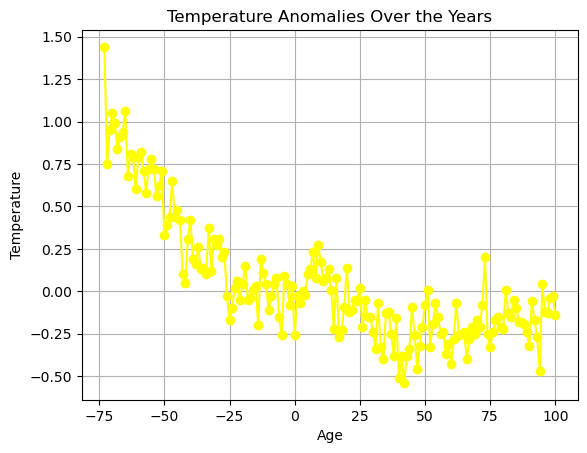

In [259]:
#Creating plot
plt.plot(TemAnomalies['Age'], TemAnomalies['Temperature'], marker='o', linestyle='-', color='yellow')
#Adding title
plt.title('Temperature Anomalies Over the Years')
#Adding labels 
plt.xlabel('Age')
plt.ylabel('Temperature')
#Adding grid 
plt.grid(True)
plt.show()

#* Python Using Matplotlib* https://www.turing.com/kb/exploring-data-visualization-with-python-using-matplotlib

## The weather data for Dublin Airport from 1971 to 2000



This Dataset contains monthly elements averaged over a 30 year period for some of our synoptic stations. Values for each month including: temperature variables, relative humidity at 09:00 UTC and 15:00 UTC, sunshine in hours, rainfall variables, wind variables and the mean number of days with different weather phenomena[].

[] https://data.europa.eu/data/datasets/723b35f3-afb3-48c4-a5e5-af36f9b6ede6?locale=en

In [246]:
# Read the csv file 
data2 = pd.read_csv('data/dublin_airport_clima.csv', skiprows=1)
data2.head()

,TEMPERATURE (degrees Celsius),Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,mean daily max,7.9,8.1,9.8,11.6,14.4,17.2,19.3,19.0,16.7,13.5,10.2,8.6,13.0
1,mean daily min,2.6,2.7,3.6,4.6,7.0,9.6,11.8,11.5,9.8,7.5,4.4,3.5,6.5
2,mean temperature,5.2,5.4,6.7,8.1,10.7,13.4,15.5,15.3,13.3,10.5,7.3,6.0,9.8
3,absolute max.,16.6,16.2,17.2,20.5,23.4,25.7,27.6,28.7,24.0,21.2,18.0,16.2,28.7
4,min. maximum,-3.8,0.4,1.3,4.4,6.5,10.4,11.7,11.9,10.6,7.5,2.4,-2.0,-3.8


In [247]:
# Checking for null entries
print(data2.isnull().sum())

TEMPERATURE (degrees Celsius)    0
Jan                              5
Feb                              5
Mar                              5
Apr                              5
May                              5
Jun                              5
Jul                              5
Aug                              5
Sep                              5
Oct                              5
Nov                              5
Dec                              5
Year                             5
dtype: int64


The column TEMPERATURE has 0 missing values.
The columns for each month (Jan to Dec) and the Year column each have 5 missing values.

In [248]:
#Information about the structure of dataset
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TEMPERATURE (degrees Celsius)  36 non-null     object 
 1   Jan                            31 non-null     float64
 2   Feb                            31 non-null     float64
 3   Mar                            31 non-null     float64
 4   Apr                            31 non-null     float64
 5   May                            31 non-null     float64
 6   Jun                            31 non-null     float64
 7   Jul                            31 non-null     float64
 8   Aug                            31 non-null     float64
 9   Sep                            31 non-null     float64
 10  Oct                            31 non-null     float64
 11  Nov                            31 non-null     float64
 12  Dec                            31 non-null     float

In [151]:
# Drop rows with null values
data2_new = data2.dropna()


In [64]:
# Print the column names
print(data2_new)

           TEMPERATURE (degrees Celsius)   Jan   Feb   Mar   Apr   May   Jun  \
0                         mean daily max   7.9   8.1   9.8  11.6  14.4  17.2   
1                         mean daily min   2.6   2.7   3.6   4.6   7.0   9.6   
2                       mean temperature   5.2   5.4   6.7   8.1  10.7  13.4   
3                          absolute max.  16.6  16.2  17.2  20.5  23.4  25.7   
4                           min. maximum  -3.8   0.4   1.3   4.4   6.5  10.4   
5                           max. minimum  11.8  11.6  11.5  12.8  13.3  16.6   
6                         absolute min.   -8.8  -5.3  -5.4  -4.0  -1.6   2.4   
7      mean num. of days with air frost    6.3   4.5   2.8   1.7   0.3   0.0   
8   mean num. of days with ground frost   15.3  13.4  12.2   9.7   3.7   0.2   
9                          mean 5cm soil   3.5   3.3   4.8   8.0  12.1  15.7   
10                        mean 10cm soil   3.8   3.7   5.0   7.7  11.3  14.8   
11                        mean 20cm soil

In [65]:
print(data2_new.head())

  TEMPERATURE (degrees Celsius)   Jan   Feb   Mar   Apr   May   Jun   Jul  \
0                mean daily max   7.9   8.1   9.8  11.6  14.4  17.2  19.3   
1                mean daily min   2.6   2.7   3.6   4.6   7.0   9.6  11.8   
2              mean temperature   5.2   5.4   6.7   8.1  10.7  13.4  15.5   
3                 absolute max.  16.6  16.2  17.2  20.5  23.4  25.7  27.6   
4                  min. maximum  -3.8   0.4   1.3   4.4   6.5  10.4  11.7   

    Aug   Sep   Oct   Nov   Dec  Year  
0  19.0  16.7  13.5  10.2   8.6  13.0  
1  11.5   9.8   7.5   4.4   3.5   6.5  
2  15.3  13.3  10.5   7.3   6.0   9.8  
3  28.7  24.0  21.2  18.0  16.2  28.7  
4  11.9  10.6   7.5   2.4  -2.0  -3.8  


In [249]:
# Assuming your DataFrame is named 'data2_new'
data = {
    'TEMPERATURE (degrees Celsius)': ['mean daily max', 'mean daily min', 'mean temperature', 'absolute max.', 'min. maximum'],
    'Jan': [7.9, 2.6, 5.2, 16.6, -3.8],
    'Feb': [8.1, 2.7, 5.4, 16.2, 0.4],
    'Mar': [9.8, 3.6, 6.7, 17.2, 1.3],
    'Apr': [11.6, 4.6, 8.1, 20.5, 4.4],
    'May': [14.4, 7.0, 10.7, 23.4, 6.5],
    'Jun': [17.2, 9.6, 13.4, 25.7, 10.4],
    'Jul': [19.3, 11.8, 15.5, 27.6, 11.7],
    'Aug': [19.0, 11.5, 15.3, 28.7, 11.9],
    'Sep': [16.7, 9.8, 13.3, 24.0, 10.6],
    'Oct': [13.5, 7.5, 10.5, 21.2, 7.5],
    'Nov': [10.2, 4.4, 7.3, 18.0, 2.4],
    'Dec': [8.6, 3.5, 6.0, 16.2, -2.0],
    'Year': [13.0, 6.5, 9.8, 28.7, -3.8]
}

data2_new = pd.DataFrame(data)

# Create a new column 'Yearly Mean Temperature'
data2_new['Yearly Mean Temperature'] = data2_new.loc[:, 'Jan':'Dec'].mean(axis=1)

# Display the updated DataFrame
print(data2_new[['TEMPERATURE (degrees Celsius)', 'Yearly Mean Temperature']])


#[] *Pandas DataFrame.loc[]* Method https://www.geeksforgeeks.org/python-pandas-dataframe-loc/
#[] *Pandas Mean Axis Argumenthttps* ://stackoverflow.com/questions/58240557/pandas-mean-axis-argument

  TEMPERATURE (degrees Celsius)  Yearly Mean Temperature
0                mean daily max                13.025000
1                mean daily min                 6.550000
2              mean temperature                 9.783333
3                 absolute max.                21.275000
4                  min. maximum                 5.108333


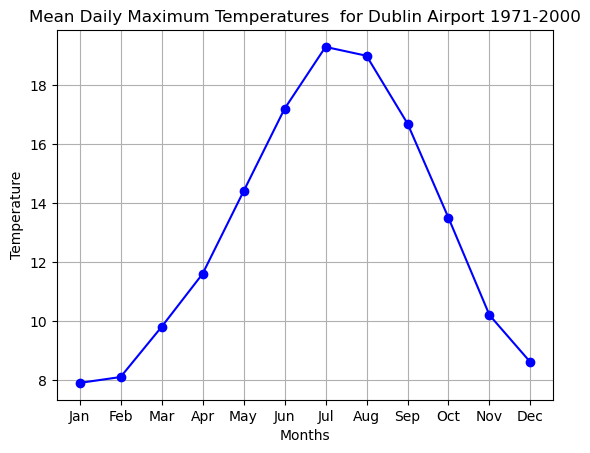

In [68]:
# Extracting relevant data for plotting
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# Adding the mean daily maximum temperatures for each month
mean_daily_max_temps = [7.9, 8.1, 9.8, 11.6, 14.4, 17.2, 19.3, 19, 16.7, 13.5, 10.2, 8.6]

# Plotting the data
plt.plot(months, mean_daily_max_temps, marker='o', linestyle='-', color='b')
# Adding title 
plt.title('Mean Daily Maximum Temperatures  for Dublin Airport 1971-2000')
# Adding lables
plt.xlabel('Months')
plt.ylabel('Temperature')
# Adding grid
plt.grid(True)
plt.show()


*matplotlib.pyplot.plot* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html


Based on the provided weather data for Dublin Airport from 1971 to 2000, the data illustrates the seasonal variation in temperatures throughout the year. The higher mean daily maximum temperatures, peaking in July and August. 

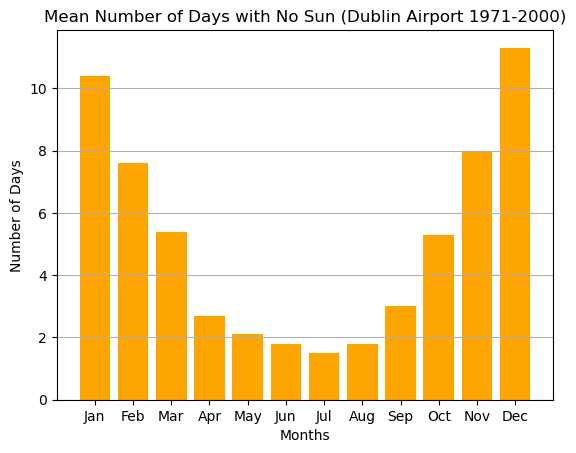

In [153]:
# Extracting relevant data for plotting
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
mean_days_with_no_sun = [10.4, 7.6, 5.4, 2.7, 2.1, 1.8, 1.5, 1.8, 3, 5.3, 8, 11.3]

# Plotting the data
plt.bar(months, mean_days_with_no_sun, color='orange')
# Adding title
plt.title('Mean Number of Days with No Sun (Dublin Airport 1971-2000)')
# Adding lables
plt.xlabel('Months')
plt.ylabel('Number of Days')
# Adding grid
plt.grid(axis='y')
plt.show()


The graph shows the number of days without sun per year.
The winter months, especially December and January, have higher values, indicating a greater likelihood of cloudy or overcast conditions during this period.
Summer months such as June and July generally show lower values, suggesting a greater frequency of sunny days during the warmer seasons.


In [154]:
print(filtered_data)


Empty DataFrame
Columns: [TEMPERATURE (degrees Celsius), Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, Year, Yearly Mean Temperature]
Index: []


## Data Visualization 

In [166]:
print(co2_composite.columns)


Index(['year', 'CO2 (ppmv)'], dtype='object')


In [196]:
co2_composite.head()

,year,CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


In [195]:
df.head()

,Age,Temperature
12,38.37379,0.88
13,46.81203,1.84
14,55.05624,3.04
15,64.41511,0.35
16,73.15077,-0.42


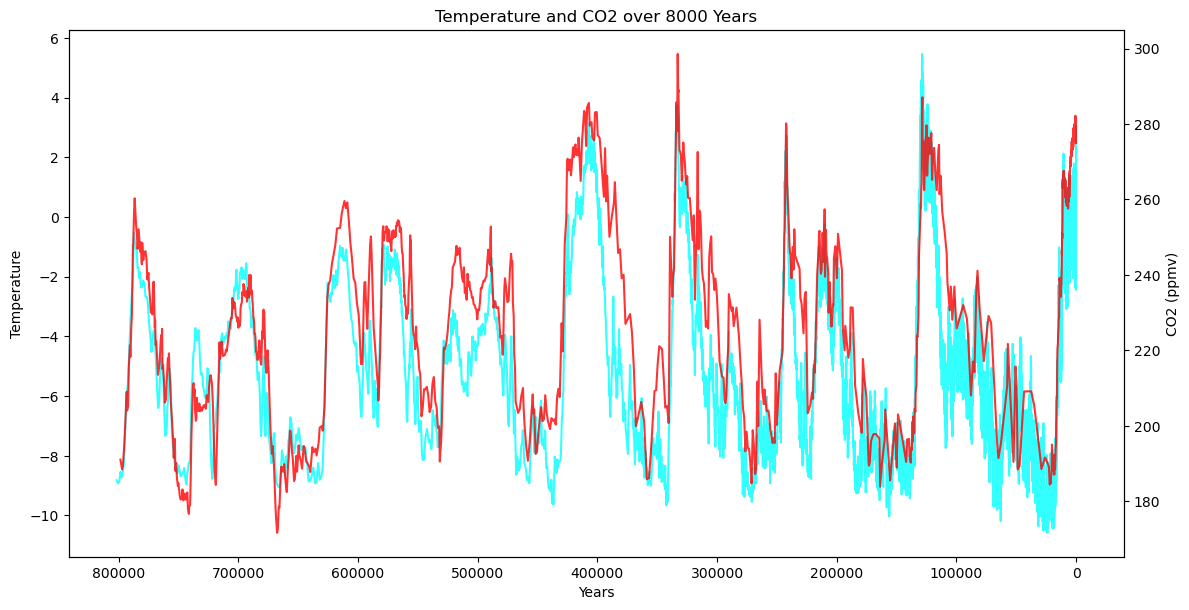

In [260]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot for temperature
ax1.plot(df['Age'], df['Temperature'], label='Temperature', color='aqua', alpha=0.8)
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature')

# Plot for CO2 
ax2.plot(co2_composite['year'], co2_composite['CO2 (ppmv)'], label='CO2 (ppmv)', color='red', alpha=0.8)
ax2.set_ylabel('CO2 (ppmv)')

# Invert the x-axis, making the latest years appear on the right
plt.gca().invert_xaxis()

# Adjust layout and show the plot
fig.tight_layout()
# Adding title
plt.title('Temperature and CO2 over 8000 Years')
plt.show()


#https://stackoverflow.com/questions/46956762/matplotlib-several-subplots-and-axes
# Secondary axis with twinx(): how to add to legend https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend

The provided code creates a two-axis graph visualizing the relationship between temperature and CO2 levels over 8,000 years. The primary y-axis shows temperature, plotted in aqua, while the secondary y-axis shows CO2 levels, plotted in red. The x-axis, representing years, is flipped to display recent years on the right. By using dual axes, it allows for a more complete understanding of potential correlations or patterns between two variables.

In [271]:
# Calculate the correlation
correlation = temperature_column.corr(co2_column)

# Print the correlation coefficient
print(f"Correlation coefficient between Temperature and CO2 (ppmv): {correlation}")


Correlation coefficient between Temperature and CO2 (ppmv): 0.33458634081058536


The correlation coefficient of 0.3346 indicates a positive correlation between temperature and CO2 levels in the atmosphere. Positive correlation means that when one variable increases, the other variable also tends to increase. In this context, this suggests that there is a positive relationship between global temperature and atmospheric CO2 concentration.

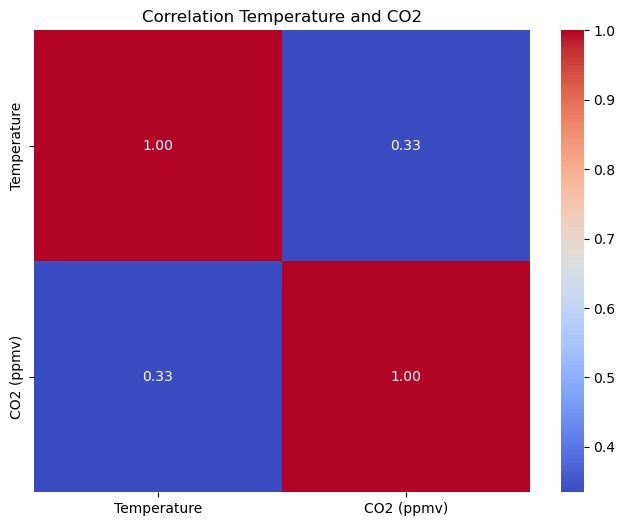

In [268]:
# Adding correlation 
correlation_df = pd.concat([df['Temperature'], co2_composite['CO2 (ppmv)']], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot for  heatmap for the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Adding title
plt.title('Correlation Temperature and CO2')
plt.show()


# *correlation* https://realpython.com/numpy-scipy-pandas-correlation-python/

# https://www.tutorialspoint.com/how-to-create-a-seaborn-correlation-heatmap-in-python#:~:text=Users%20may%20use%20Seaborn's%20load,method%20to%20produce%20the%20heatmap.


## Predictions for atmospheric CO2 levels and global temperature anomaly




Understanding the complex interactions between atmospheric carbon dioxide (CO2) levels and global temperature anomalies is crucial to assessing the potential impacts of climate change. Over the past decades, many factors have influenced the Earth's climate, and one of the key factors has been the increasing concentration of CO2.
A simple linear regression model is used to predict global temperature anomalies based on synthetic CO2 data. While this is a simplified model, it serves as a starting point for understanding potential trends in a changing climate.
To validate and contextualize our predictions, we plan to compare our synthesized data with the results of established climate models used by the scientific community. This comparative analysis aims to assess the robustness and reliability of our predictions compared to more sophisticated models that take into account a wider range of climate variables.

We use <code>LinearRegression</code> is to create a simple linear regression model. 
The LinearRegression model assumes a linear relationship between the independent variable (CO2 levels in this case) and the dependent variable (global temperature anomalies). 
The <code>train_test_split function</code> from scikit-learn is commonly used to split a dataset into training and testing sets.
The <code>mean_squared_error</code> function evaluates the performance of a regression model by calculating the mean squared error (MSE) between the predicted values and the actual value.

Mean Squared Error: 0.03832135991899582


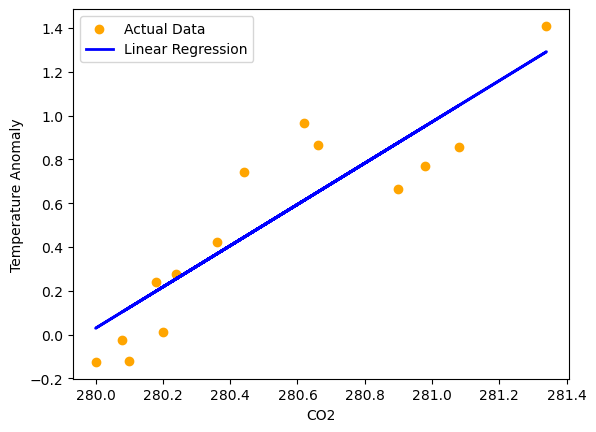

In [288]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data for atmospheric CO2 levels and global temperature anomaly
years = np.arange(1960, 2030, 1)
co2_levels = 280 + 0.02 * (years - 1960)
temperature_anomaly = 0.02 * (years - 1960) + np.random.normal(0, 0.2, len(years))

# Use only the temperature as the target variable
y = temperature_anomaly

# Reshape the CO2 levels data to a column vector
X = co2_levels.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the original data and the linear regression line
plt.scatter(X_test, y_test, color='orange', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Linear Regression')
plt.xlabel('CO2')
plt.ylabel('Temperature Anomaly')
#Adding legend
plt.legend()
plt.show()


A mean squared error (MSE) value of 0.0461 indicates the mean squared difference between the actual and predicted CO2 levels in the test set. A lower MSE generally suggests that the model predictions are closer to the actual values.